In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
from evaluation import *
import time

In [10]:
filename='./xes/PermitLog.xes'

In [11]:
log, VARIANT = read_xes(filename)


=READ THE XES FILE
length of log 7065 
length of event 86581 
number of variants : 1478


In [7]:
d=plot_distribution_log(log)

NameError: name 'plot_distribution_log' is not defined

In [ ]:
len(d)
np.median(d)
np.average(d)
np.quantile(d, q=[0.25,0.5,0.75])
np.sqrt(np.var(d))

In [ ]:
sum(d>np.average(d))/len(d)

In [ ]:
from scipy.stats import norm, kurtosis
kurtosis(d)

In [ ]:
sum(d)
sum(d[d>1])
sum(d==1)


sum(d==1) / sum(d)


In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
xdata=np.array([i for i in range(len(d))])

popt, pcov = curve_fit(func, xdata, d)
popt
plt.figure(figsize=(10,5))
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(d, color='gray')

In [ ]:
from scipy.stats import norm, kurtosis, skew
kurtosis(d)
skew(d)

In [ ]:
pickle_name = './pickles/result_' + filename[6:-4] + '_2020-12-22.p' 

In [ ]:
result=pickle.load(open(pickle_name, 'rb'))

In [6]:
visualize_evaluation(result, pickle_name[17:-13])

NameError: name 'result' is not defined

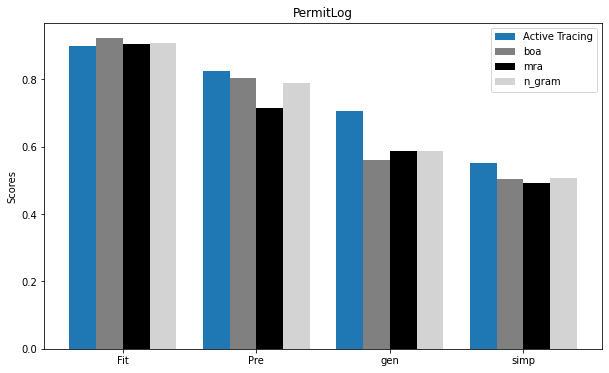

In [21]:
visualize_evaluation(result, pickle_name[17:-13])

In [1]:
from evaluation import *
import time
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristic_miner

In [2]:
filename = 'filtered_3way_after_80%.xes'
# filename = 'BPI_Challenge_2012.xes'


In [3]:
# log, VARIANT = read_xes(filename, n_DPI = 15)
log, VARIANT = read_xes(filename)


=READ THE XES FILElength of log 2534 
length of event 13589 
number of variants : 26


In [6]:
log_test = log[0:10]

In [5]:
# variants_count = case_statistics.get_variant_statistics(log_filtered)
# log_filtered = variants_filter.apply(log, [VARIANT[0]])    
net, im, fm = heuristics_miner.apply(log)
# net, im, fm = inductive_miner.apply(log)

In [7]:
len(log)

2534

In [8]:

from pm4py.algo.discovery.footprints import algorithm as footprints_discovery

fp_log = footprints_discovery.apply(log, variant=footprints_discovery.Variants.ENTIRE_EVENT_LOG)

In [10]:
fp_log['activities']


{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'Z'}

In [11]:
len(fp_log['activities'])

12

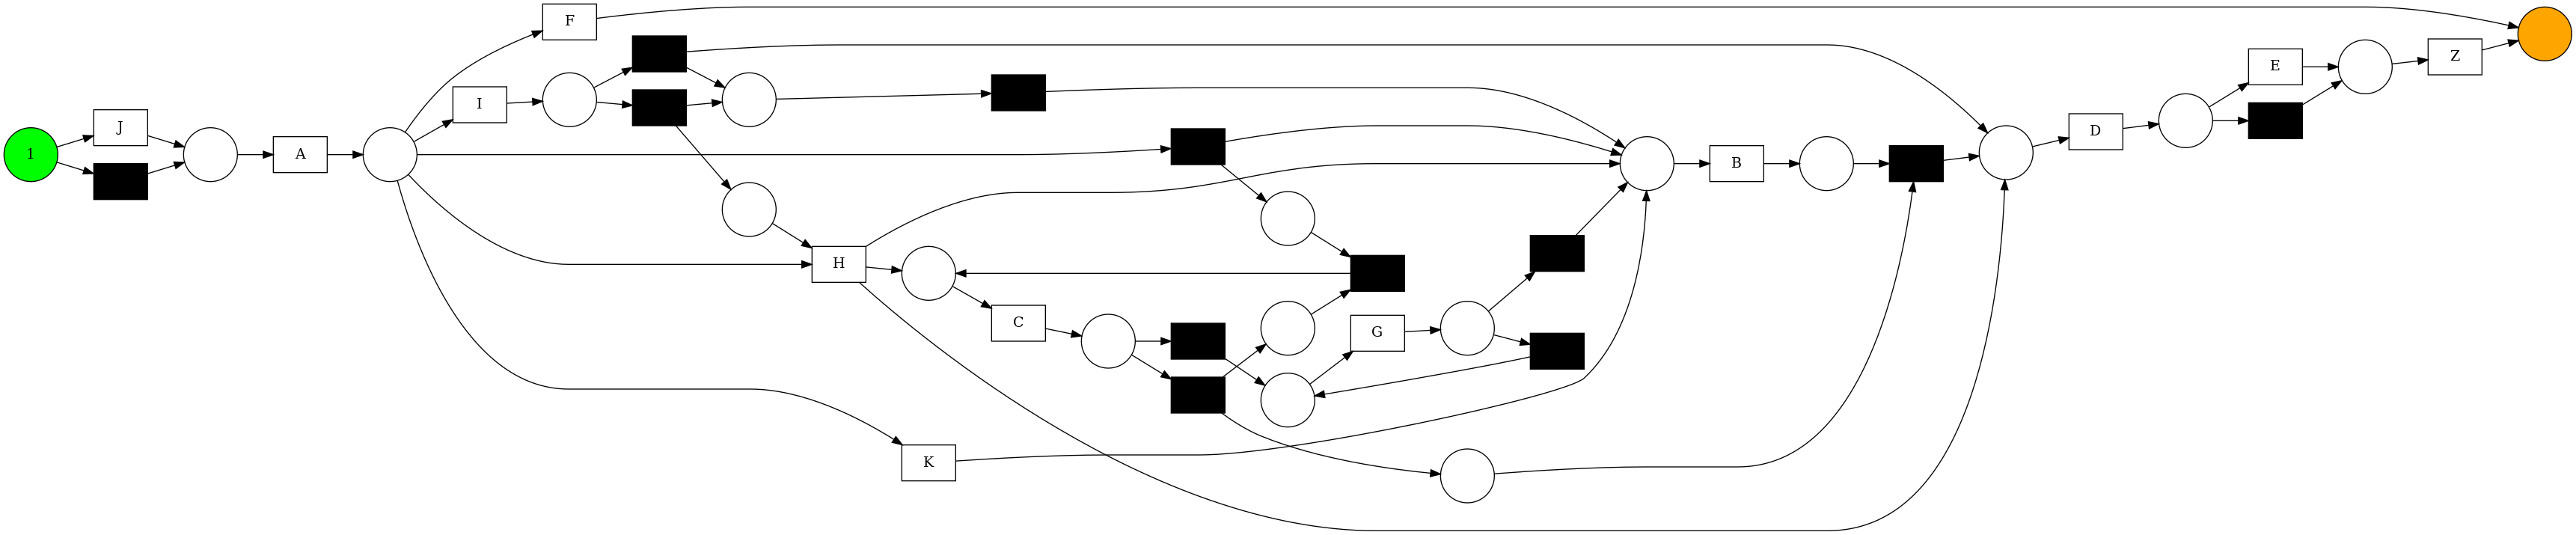

In [6]:
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

In [12]:
evaluation_w_hm(log)

evaluation_w_hm() called


[2534,
 0.8739722745769061,
 0.9861665165358384,
 0.8909098329789268,
 0.6056338028169015]

In [85]:
net.places

{pre_B, pre_C, pre_D, pre_Z, sink0, source0}

In [86]:
log[0][2]['concept:name'] = 'C'

In [88]:
case_statistics.get_variant_statistics(log)

[{'variant': 'A,B,C,D,Z', 'count': 1105},
 {'variant': 'A,C,B,D,Z', 'count': 481},
 {'variant': 'A,B,C,D,E,Z', 'count': 153},
 {'variant': 'A,F', 'count': 110},
 {'variant': 'A,C,G,B,D,Z', 'count': 98},
 {'variant': 'A,C,B,D,E,Z', 'count': 97},
 {'variant': 'A,H,B,C,D,Z', 'count': 90},
 {'variant': 'A,I,B,C,D,Z', 'count': 67},
 {'variant': 'A,I,C,B,D,Z', 'count': 47},
 {'variant': 'A,C,G,B,D,E,Z', 'count': 44},
 {'variant': 'A,H,C,B,D,Z', 'count': 37},
 {'variant': 'A,H,C,B,D,E,Z', 'count': 29},
 {'variant': 'J,A,B,C,D,Z', 'count': 23},
 {'variant': 'A,I,H,B,C,D,Z', 'count': 19},
 {'variant': 'A,K,B,C,D,E,Z', 'count': 13},
 {'variant': 'A,I,B,C,D,E,Z', 'count': 13},
 {'variant': 'A,C,C,C,C,G,G,G,G,B,D,Z', 'count': 13},
 {'variant': 'A,B,C,I,D,Z', 'count': 13},
 {'variant': 'A,B,C,H,D,Z', 'count': 13},
 {'variant': 'A,B,C,I,D,E,Z', 'count': 12},
 {'variant': 'A,C,C,C,G,G,G,B,D,Z', 'count': 11},
 {'variant': 'A,K,B,C,D,Z', 'count': 10},
 {'variant': 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'count'

In [52]:
for l in  log_test[0] : 
    l['concept:name'] = l['concept:name'] + '_'

In [89]:
case_statistics.get_variant_statistics(log_test)

[{'variant': 'A,B,C,D,Z', 'count': 8}, {'variant': 'A,B_,C,D_,Z', 'count': 1}]

In [90]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
replayed_traces = token_replay.apply(log_test, net, im,fm)

In [91]:
case_statistics.get_variant_statistics([log[0]])

[{'variant': 'A,B_,C,D_,Z', 'count': 1}]

In [14]:
import logging
logging.basicConfig(filename='example.log', level=logging.DEBUG)
logging.debug('This message should go to the log file')
logging.info('So should this')
logging.warning('And this, too')
logging.error('And non-ASCII stuff, too, like Øresund and Malmö')


In [92]:
replayed_traces

[{'trace_is_fit': False,
  'trace_fitness': 0.5,
  'activated_transitions': [A, C, Z],
  'reached_marking': ['pre_B:1', 'pre_D:1', 'sink0:1'],
  'enabled_transitions_in_marking': {B, D},
  'transitions_with_problems': [C, Z],
  'missing_tokens': 2,
  'consumed_tokens': 4,
  'remaining_tokens': 2,
  'produced_tokens': 4},
 {'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [A, B, C, D, Z],
  'reached_marking': ['sink0:1'],
  'enabled_transitions_in_marking': set(),
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 6,
  'remaining_tokens': 0,
  'produced_tokens': 6},
 {'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [A, B, C, D, Z],
  'reached_marking': ['sink0:1'],
  'enabled_transitions_in_marking': set(),
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 6,
  'remaining_tokens': 0,
  'produced_tokens': 6},
 {'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': 

In [54]:
def behaviour_recall(replayed_traces) : 
    tp = 0
    fn = 0
    missing =0
    for r in replayed_traces : 
        fn +=len(r['transitions_with_problems']) #False Negative - the algorithm thought it was not supposed to be fired (negative), but it should be fired. False Negative 
        tp += len([i for i in r['activated_transitions'] if str(i).find('hid')==-1])- len(r['transitions_with_problems'])
        
        missing += r['missing_tokens']
    return tp/(tp+fn)

In [55]:
behaviour_recall(replayed_traces)

0.8004268158069027

In [59]:
case_statistics.get_variant_statistics([log[2509]])

[{'variant': 'A,B,I,C,D,Z', 'count': 1}]

In [62]:
net.places

{intplace_A,
 intplace_C,
 intplace_D,
 intplace_G,
 intplace_I,
 pre_A,
 pre_B,
 pre_C,
 pre_D,
 pre_G,
 pre_Z,
 sink0,
 source0,
 splace_in_B_3,
 splace_in_C_A_0,
 splace_in_C_C_0,
 splace_in_D_B_0,
 splace_in_D_C_0,
 splace_in_H_I_0}

In [60]:
replayed_traces[2509]

{'trace_is_fit': False,
 'trace_fitness': 0.7552447552447552,
 'activated_transitions': [hid_2, A, hid_18, B, I, C, hid_29, D, hid_34, Z],
 'reached_marking': ['intplace_C:1', 'sink0:1', 'splace_in_B_3:1', 'splace_in_C_A_0:1', 'splace_in_D_B_0:1'],
 'enabled_transitions_in_marking': {B, C, D, G},
 'transitions_with_problems': [I, C],
 'missing_tokens': 2,
 'consumed_tokens': 11,
 'remaining_tokens': 4,
 'produced_tokens': 13}

In [ ]:
behaviour_precision

In [63]:

from pm4py.simulation.playout import simulator

simulated_log = simulator.apply(net, im, variant=simulator.Variants.BASIC_PLAYOUT, parameters={simulator.Variants.BASIC_PLAYOUT.value.Parameters.NO_TRACES: 50})
                              

In [87]:
simulated_log[0][1]['concept:name'] = 'K'

In [92]:
simulated_log[0][1]

{'concept:name': 'K', 'time:timestamp': datetime.datetime(1970, 4, 26, 18, 46, 41)}

In [86]:
simulated_log[0][1]

{'concept:name': 'KAKA', 'time:timestamp': datetime.datetime(1970, 4, 26, 18, 46, 41)}

In [67]:
case_statistics.get_variant_statistics(simulated_log)

[{'variant': 'J,A,F', 'count': 11},
 {'variant': 'A,K,B', 'count': 9},
 {'variant': 'A,F', 'count': 8},
 {'variant': 'A,B', 'count': 6},
 {'variant': 'J,A,B', 'count': 5},
 {'variant': 'J,A,K,B', 'count': 4},
 {'variant': 'J,A,I,B', 'count': 3},
 {'variant': 'J,A,I,D,Z,B', 'count': 1},
 {'variant': 'J,A,I,B,D,E,Z', 'count': 1},
 {'variant': 'A,I,D,E,B,Z', 'count': 1},
 {'variant': 'A,I,B', 'count': 1}]

In [95]:

from pm4py.algo.discovery.footprints import algorithm as footprints_discovery

fp_log = footprints_discovery.apply(log, variant=footprints_discovery.Variants.ENTIRE_EVENT_LOG)

In [105]:
fp_log['activities']

{'A', 'B', 'B_', 'C', 'D', 'D_', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'Z'}

In [112]:
max = 0
for v in VARIANT :
    l = len(v.split(','))
    if l > max :
        max = l
        print(v)

A,B,C,D,Z
A,B,C,D,E,Z
A,C,G,B,D,E,Z
A,C,C,C,C,G,G,G,G,B,D,Z
A,C,C,C,C,C,G,G,G,G,G,B,D,Z
A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z


In [120]:
test_mat = []
for v in VARIANT : 
    test_mat.append(v.split(','))

In [124]:
test_mat=np.array(test_mat)

In [128]:
test_mat.T

array([list(['A', 'B', 'C', 'D', 'Z']), list(['A', 'C', 'B', 'D', 'Z']),
       list(['A', 'B', 'C', 'D', 'E', 'Z']), list(['A', 'F']),
       list(['A', 'C', 'G', 'B', 'D', 'Z']),
       list(['A', 'C', 'B', 'D', 'E', 'Z']),
       list(['A', 'H', 'B', 'C', 'D', 'Z']),
       list(['A', 'I', 'B', 'C', 'D', 'Z']),
       list(['A', 'I', 'C', 'B', 'D', 'Z']),
       list(['A', 'C', 'G', 'B', 'D', 'E', 'Z']),
       list(['A', 'H', 'C', 'B', 'D', 'Z']),
       list(['A', 'H', 'C', 'B', 'D', 'E', 'Z']),
       list(['J', 'A', 'B', 'C', 'D', 'Z']),
       list(['A', 'I', 'H', 'B', 'C', 'D', 'Z']),
       list(['A', 'I', 'B', 'C', 'D', 'E', 'Z']),
       list(['A', 'K', 'B', 'C', 'D', 'E', 'Z']),
       list(['A', 'B', 'C', 'I', 'D', 'Z']),
       list(['A', 'C', 'C', 'C', 'C', 'G', 'G', 'G', 'G', 'B', 'D', 'Z']),
       list(['A', 'B', 'C', 'H', 'D', 'Z']),
       list(['A', 'B', 'C', 'I', 'D', 'E', 'Z']),
       list(['A', 'C', 'C', 'C', 'G', 'G', 'G', 'B', 'D', 'Z']),
       list(['A', '

In [130]:
test_mat

array([list(['A', 'B', 'C', 'D', 'Z']), list(['A', 'C', 'B', 'D', 'Z']),
       list(['A', 'B', 'C', 'D', 'E', 'Z']), list(['A', 'F']),
       list(['A', 'C', 'G', 'B', 'D', 'Z']),
       list(['A', 'C', 'B', 'D', 'E', 'Z']),
       list(['A', 'H', 'B', 'C', 'D', 'Z']),
       list(['A', 'I', 'B', 'C', 'D', 'Z']),
       list(['A', 'I', 'C', 'B', 'D', 'Z']),
       list(['A', 'C', 'G', 'B', 'D', 'E', 'Z']),
       list(['A', 'H', 'C', 'B', 'D', 'Z']),
       list(['A', 'H', 'C', 'B', 'D', 'E', 'Z']),
       list(['J', 'A', 'B', 'C', 'D', 'Z']),
       list(['A', 'I', 'H', 'B', 'C', 'D', 'Z']),
       list(['A', 'I', 'B', 'C', 'D', 'E', 'Z']),
       list(['A', 'K', 'B', 'C', 'D', 'E', 'Z']),
       list(['A', 'B', 'C', 'I', 'D', 'Z']),
       list(['A', 'C', 'C', 'C', 'C', 'G', 'G', 'G', 'G', 'B', 'D', 'Z']),
       list(['A', 'B', 'C', 'H', 'D', 'Z']),
       list(['A', 'B', 'C', 'I', 'D', 'E', 'Z']),
       list(['A', 'C', 'C', 'C', 'G', 'G', 'G', 'B', 'D', 'Z']),
       list(['A', '

In [134]:
VARIANT_mat=np.empty(
    (len(VARIANT), max),
    dtype='str'
)

In [135]:
for i,v in enumerate(VARIANT) : 
    VARIANT_mat[i,:len(v.split(','))] = v.split(',')

In [171]:
cand_negative_events = fp_log['activities'] - set(VARIANT_mat.T[0])

In [228]:
l=[variants_filter.apply(log,VARIANT[0])[0]]


In [229]:
import copy
log_new = l.copy()

In [230]:
for i in range(len(cand_negative_events)):
    log_new.append(copy.deepcopy(l[0]))

In [263]:
net, im, fm = heuristic_miner.apply([log[4]])
# net, im, fm = inductive_miner.apply(log_new)

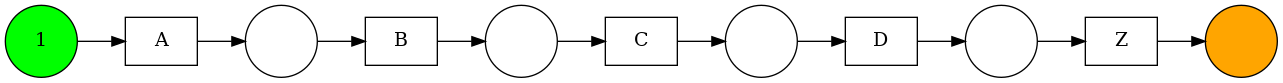

In [264]:
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

In [265]:
case_statistics.get_variant_statistics(log_new)

[{'variant': 'Z,B,C,D,Z', 'count': 1},
 {'variant': 'K,B,C,D,Z', 'count': 1},
 {'variant': 'I,B,C,D,Z', 'count': 1},
 {'variant': 'H,B,C,D,Z', 'count': 1},
 {'variant': 'G,B,C,D,Z', 'count': 1},
 {'variant': 'F,B,C,D,Z', 'count': 1},
 {'variant': 'E,B,C,D,Z', 'count': 1},
 {'variant': 'D_,B,C,D,Z', 'count': 1},
 {'variant': 'D,B,C,D,Z', 'count': 1},
 {'variant': 'C,B,C,D,Z', 'count': 1},
 {'variant': 'B_,B,C,D,Z', 'count': 1},
 {'variant': 'B,B,C,D,Z', 'count': 1},
 {'variant': 'A,B,C,D,Z', 'count': 1}]

In [266]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
replayed_traces = token_replay.apply(log_new, net, im,fm)

In [273]:
for i,v in enumerate(case_statistics.get_variant_statistics(log_new)) : 
    print("\n",v['variant'])
    print(replayed_traces[i])


 Z,B,C,D,Z
{'trace_is_fit': False, 'trace_fitness': 0.8, 'activated_transitions': [B, C, D, Z], 'reached_marking': ['sink0:1', 'source0:1'], 'enabled_transitions_in_marking': {A}, 'transitions_with_problems': [B], 'missing_tokens': 1, 'consumed_tokens': 5, 'remaining_tokens': 1, 'produced_tokens': 5}

 K,B,C,D,Z
{'trace_is_fit': False, 'trace_fitness': 0.6666666666666667, 'activated_transitions': [B, B, C, D, Z], 'reached_marking': ['pre_C:1', 'sink0:1', 'source0:1'], 'enabled_transitions_in_marking': {C, A}, 'transitions_with_problems': [B, B], 'missing_tokens': 2, 'consumed_tokens': 6, 'remaining_tokens': 2, 'produced_tokens': 6}

 I,B,C,D,Z
{'trace_is_fit': False, 'trace_fitness': 0.8, 'activated_transitions': [B, C, D, Z], 'reached_marking': ['sink0:1', 'source0:1'], 'enabled_transitions_in_marking': {A}, 'transitions_with_problems': [B], 'missing_tokens': 1, 'consumed_tokens': 5, 'remaining_tokens': 1, 'produced_tokens': 5}

 H,B,C,D,Z
{'trace_is_fit': False, 'trace_fitness': 0.8

In [96]:
fp_log['parallel']

{('B', 'C'),
 ('B', 'I'),
 ('C', 'B'),
 ('C', 'C'),
 ('C', 'H'),
 ('C', 'I'),
 ('G', 'G'),
 ('H', 'C'),
 ('I', 'B'),
 ('I', 'C')}

In [97]:
fp_log['sequence']

{('A', 'B'),
 ('A', 'B_'),
 ('A', 'C'),
 ('A', 'F'),
 ('A', 'H'),
 ('A', 'I'),
 ('A', 'K'),
 ('B', 'D'),
 ('B_', 'C'),
 ('C', 'D'),
 ('C', 'D_'),
 ('C', 'G'),
 ('D', 'E'),
 ('D', 'Z'),
 ('D_', 'Z'),
 ('E', 'Z'),
 ('G', 'B'),
 ('H', 'B'),
 ('H', 'D'),
 ('I', 'D'),
 ('I', 'H'),
 ('J', 'A'),
 ('K', 'B')}

In [98]:
fp_log

{'dfg': Counter({('A', 'B_'): 1,
          ('B_', 'C'): 1,
          ('C', 'D_'): 1,
          ('D_', 'Z'): 1,
          ('A', 'B'): 1336,
          ('B', 'C'): 1539,
          ('C', 'D'): 1510,
          ('D', 'Z'): 2062,
          ('A', 'C'): 762,
          ('C', 'B'): 691,
          ('B', 'D'): 875,
          ('D', 'E'): 361,
          ('E', 'Z'): 361,
          ('A', 'F'): 110,
          ('C', 'G'): 184,
          ('G', 'B'): 184,
          ('A', 'H'): 156,
          ('H', 'B'): 109,
          ('A', 'I'): 146,
          ('I', 'B'): 80,
          ('I', 'C'): 56,
          ('H', 'C'): 66,
          ('J', 'A'): 23,
          ('I', 'H'): 19,
          ('A', 'K'): 23,
          ('K', 'B'): 23,
          ('C', 'I'): 25,
          ('I', 'D'): 25,
          ('C', 'C'): 149,
          ('G', 'G'): 141,
          ('C', 'H'): 13,
          ('H', 'D'): 13,
          ('B', 'I'): 9}),
 'sequence': {('A', 'B'),
  ('A', 'B_'),
  ('A', 'C'),
  ('A', 'F'),
  ('A', 'H'),
  ('A', 'I'),
  ('A', 'K'),
  

In [102]:
VARIANT[0].split(',')

['A', 'B', 'C', 'D', 'Z']

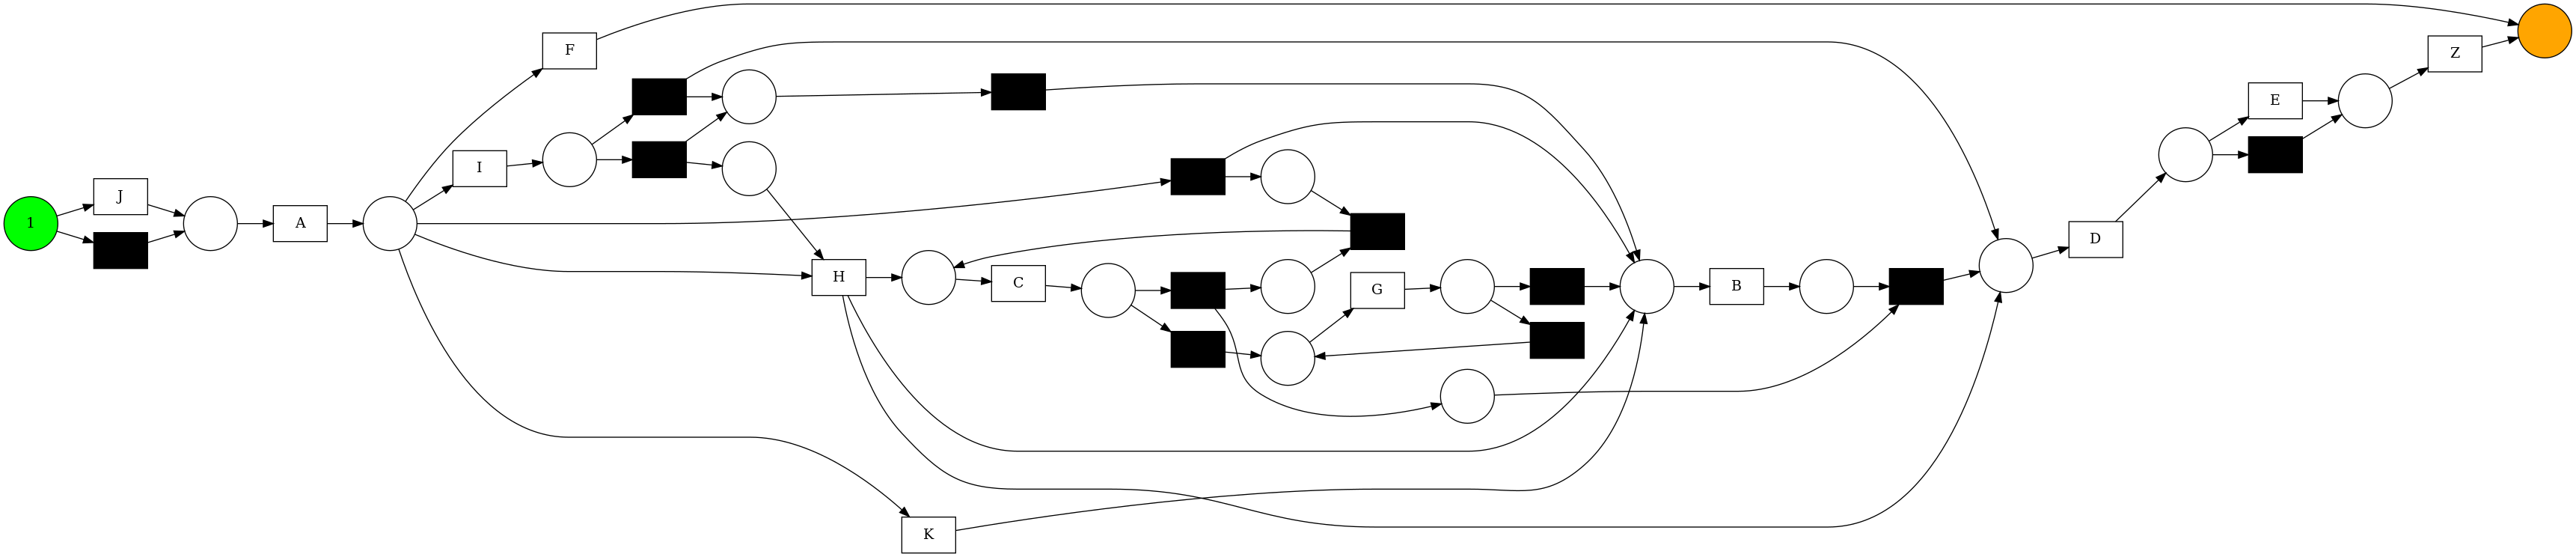

In [5]:
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

# the number of Traces 

In [86]:

#number of traces
len(log)

2534

# Activities 

In [94]:

tasks = set()
for v in VARIANT:
    tasks=tasks.union(set(v.split(',')))
tasks

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'Z'}

In [47]:
len(replayed_traces)

2534

In [9]:
len(log)

13087

hello
0.00048065185546875


In [27]:
start = time.time()

list_fit=[]
for v in VARIANT : 
    log_filtered = variants_filter.apply(log, [v])
    
    net, im, fm = heuristics_miner.apply(log_filtered)
#     gviz = pn_visualizer.apply(net, im, fm)
#     pn_visualizer.view(gviz)
    fitness = replay_fitness_evaluator.apply(
            log_filtered, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)['log_fitness']
    list_fit.append(fitness)
    if fitness <1 : print(fitness)

end = time.time()
print(end - start)

NameError: name 'time' is not defined

In [108]:

def test(type=['hm','im']):
    
    start = time.time()

    from pm4py.objects.log.importer.xes import importer as xes_importer
    from pm4py.algo.discovery.inductive import algorithm as inductive_miner

    list_fit=[]
    for i, v in enumerate(VARIANT) : 
        log_filtered = variants_filter.apply(log, [v])

        if type == 'im' : 
            net, im, fm = inductive_miner.apply(log_filtered)
            
        else :
            net, im, fm = heuristics_miner.apply(log_filtered)

    #     gviz = pn_visualizer.apply(net, im, fm)
    #     pn_visualizer.view(gviz)
        fitness = replay_fitness_evaluator.apply(
                log_filtered, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)['log_fitness']
        list_fit.append(fitness)
        if fitness <1 : 
            print(fitness)
            print(i)
            print(v)
        if i%50 == 0 : 
            print("{} traces have been checked out of {} at time{}".format(i, len(VARIANT), time.time() - start))

    end = time.time()
    print(end - start)

In [109]:

test('hm')

0 traces have been checked out of 4366 at time0.1871631145477295
0.9821428571428571
26
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,A_CANCELLED,O_CANCELLED,W_Nabellen offertes
50 traces have been checked out of 4366 at time8.727326393127441
0.9956140350877193
75
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen off

KeyboardInterrupt: 

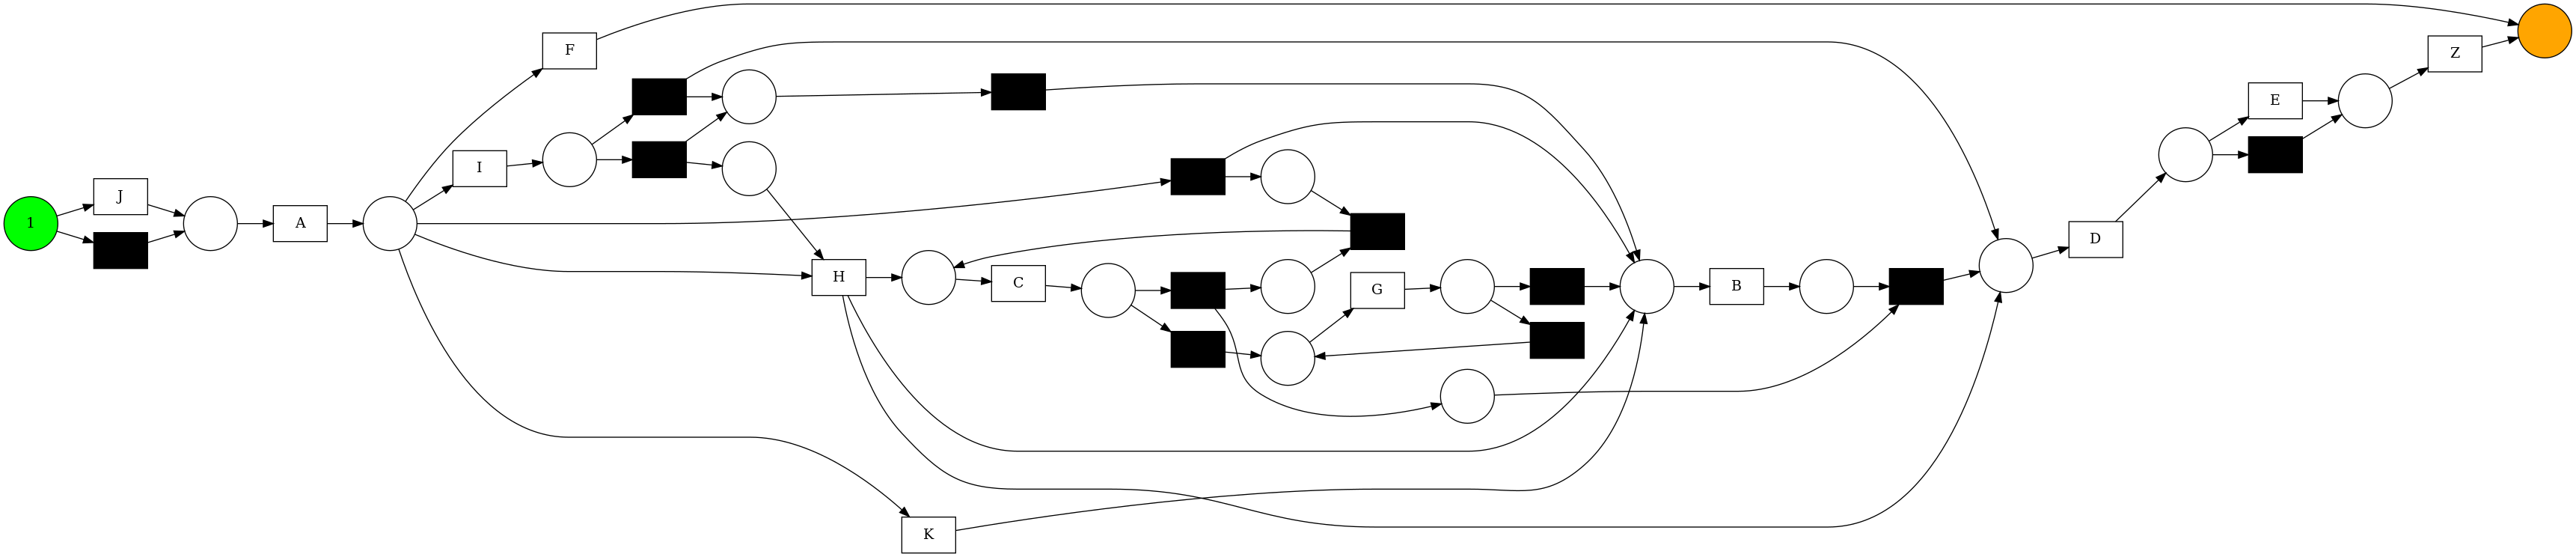

In [5]:
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

In [31]:
case_statistics.get_variant_statistics([log[2501]])

[{'variant': 'A,K,B,C,D,Z', 'count': 1}]

In [6]:
net.places

{intplace_A,
 intplace_C,
 intplace_D,
 intplace_G,
 intplace_I,
 pre_A,
 pre_B,
 pre_C,
 pre_D,
 pre_G,
 pre_Z,
 sink0,
 source0,
 splace_in_B_3,
 splace_in_C_A_0,
 splace_in_C_C_0,
 splace_in_D_B_0,
 splace_in_D_C_0,
 splace_in_H_I_0}

In [60]:

from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfg = dfg_discovery.apply(log)

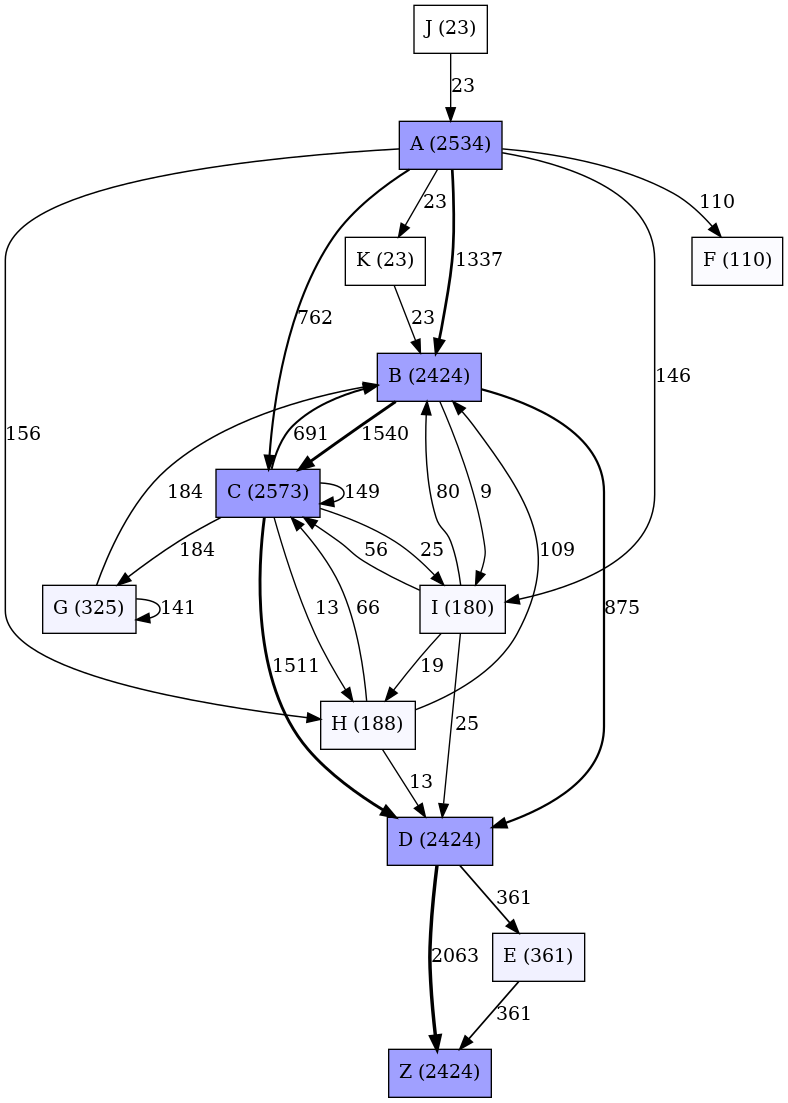

In [62]:
from pm4py.visualization.dfg import visualizer as dfg_visualization
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

In [63]:
dfg

Counter({('A', 'B'): 1337,
         ('B', 'C'): 1540,
         ('C', 'D'): 1511,
         ('D', 'Z'): 2063,
         ('A', 'C'): 762,
         ('C', 'B'): 691,
         ('B', 'D'): 875,
         ('D', 'E'): 361,
         ('E', 'Z'): 361,
         ('A', 'F'): 110,
         ('C', 'G'): 184,
         ('G', 'B'): 184,
         ('A', 'H'): 156,
         ('H', 'B'): 109,
         ('A', 'I'): 146,
         ('I', 'B'): 80,
         ('I', 'C'): 56,
         ('H', 'C'): 66,
         ('J', 'A'): 23,
         ('I', 'H'): 19,
         ('A', 'K'): 23,
         ('K', 'B'): 23,
         ('C', 'I'): 25,
         ('I', 'D'): 25,
         ('C', 'C'): 149,
         ('G', 'G'): 141,
         ('C', 'H'): 13,
         ('H', 'D'): 13,
         ('B', 'I'): 9})